## Transfer Learning Resnet 50 using Keras

In [1]:
# import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [221]:
# re-size all the images to [224, 224]
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [222]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [223]:
for layer in resnet.layers:
    layer.trainable = False

In [224]:
# Useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [225]:
# our layers
x = Flatten()(resnet.output)

In [226]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

model = Model(inputs=resnet.input, outputs=prediction)

In [227]:

# view the structure of the model
model.summary()


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [228]:
# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [229]:
# Import the images from the dataset using the Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [230]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [231]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47 images belonging to 3 classes.


In [232]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
3/3 [==============================] - 18s 5s/step - loss: 4.5667 - accuracy: 0.3027 - val_loss: 6.2749 - val_accuracy: 0.5106
Epoch 2/50
3/3 [==============================] - 12s 4s/step - loss: 7.5278 - accuracy: 0.3358 - val_loss: 11.1053 - val_accuracy: 0.2979
Epoch 3/50
3/3 [==============================] - 12s 5s/step - loss: 9.5938 - accuracy: 0.3460 - val_loss: 5.2323 - val_accuracy: 0.5106
Epoch 4/50
3/3 [==============================] - 12s 4s/step - loss: 6.2848 - accuracy: 0.3894 - val_loss: 1.8464 - val_accuracy: 0.5106
Epoch 5/50
3/3 [==============================] - 12s 5s/step - loss: 2.5704 - accuracy: 0.4138 - val_loss: 4.5158 - val_accuracy: 0.3404
Epoch 6/50
3/3 [==============================] - 12s 5s/step - loss: 3.0716 - accuracy: 0.3915 - val_loss: 1.8098 - val_accuracy: 0.3830
Epoch 7/50
3/3 [==============================] - 12s 5s/step - loss: 1.6415 - accuracy: 0.4788 - val_loss: 2.7939 - val_accuracy: 0.5532
Epoch 8/50
3/3 [=================

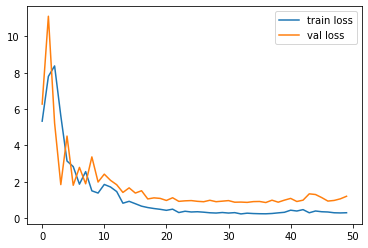

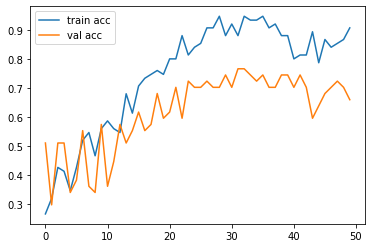

In [233]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [234]:
# save the moedel as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [235]:
y_pred = model.predict(test_set)

In [236]:
y_pred

array([[7.29650911e-03, 9.89338815e-01, 3.36467871e-03],
       [9.65569377e-01, 3.31864171e-02, 1.24419271e-03],
       [5.85200250e-01, 2.04667151e-01, 2.10132629e-01],
       [1.85968587e-03, 9.98128355e-01, 1.20187588e-05],
       [8.44647366e-06, 4.56707226e-03, 9.95424449e-01],
       [5.75034142e-01, 4.21623528e-01, 3.34235677e-03],
       [9.57455952e-03, 9.85319912e-01, 5.10548428e-03],
       [9.06064920e-03, 9.45517242e-01, 4.54220623e-02],
       [8.72787178e-01, 1.22093961e-01, 5.11891302e-03],
       [3.79688456e-04, 9.99375641e-01, 2.44683062e-04],
       [4.86593954e-02, 9.00603771e-01, 5.07368781e-02],
       [8.36116374e-02, 1.82660464e-02, 8.98122311e-01],
       [4.84073767e-04, 9.99303460e-01, 2.12355386e-04],
       [2.18533562e-04, 9.98380780e-01, 1.40073104e-03],
       [2.87273026e-04, 9.88405704e-01, 1.13070821e-02],
       [1.59323253e-02, 9.23022747e-01, 6.10448904e-02],
       [1.06399320e-01, 1.43784215e-03, 8.92162919e-01],
       [1.81177631e-02, 9.41317

In [237]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [238]:
y_pred

array([1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1], dtype=int64)

In [239]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [240]:
model=load_model('model_resnet50.h5')

In [241]:
img=image.load_img('Datasets/Test/audi/23.jpg',target_size=(224,224))

In [242]:
x=image.img_to_array(img)
x

array([[[171., 171., 171.],
        [173., 173., 173.],
        [180., 180., 180.],
        ...,
        [178., 181., 186.],
        [151., 154., 159.],
        [137., 140., 145.]],

       [[179., 179., 179.],
        [182., 182., 182.],
        [189., 189., 189.],
        ...,
        [201., 204., 209.],
        [169., 172., 177.],
        [145., 148., 153.]],

       [[191., 191., 191.],
        [194., 194., 194.],
        [200., 200., 200.],
        ...,
        [205., 208., 213.],
        [171., 174., 179.],
        [146., 149., 154.]],

       ...,

       [[218., 206., 208.],
        [216., 204., 206.],
        [211., 199., 201.],
        ...,
        [112., 103.,  96.],
        [109., 100.,  93.],
        [109., 100.,  93.]],

       [[220., 208., 210.],
        [218., 206., 208.],
        [212., 200., 202.],
        ...,
        [116., 107., 100.],
        [114., 105.,  98.],
        [114., 105.,  98.]],

       [[220., 211., 212.],
        [218., 209., 210.],
        [211., 2

In [243]:
x.shape

(224, 224, 3)

In [244]:
x=x/255

In [245]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [246]:
model.predict(img_data)

array([[0.00473206, 0.22371812, 0.7715499 ]], dtype=float32)

In [247]:
a=np.argmax(model.predict(img_data), axis=1)

In [248]:
a

array([2], dtype=int64)